In [2]:
import os
os.chdir('E:\PythonClass')
import pandas as pd
list=['symboling','norm_loss','make','fuel_type','aspiration','n_o_d','body_style','drive_wheels','eng_loc','wheel_base','length','width','height','curb_weight','engine_type','n_o_c','eng_size','fuel_system','bore','stroke','comp_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']
df=pd.read_csv('automobile.csv',na_values=['?'],names=list)
df.head()

,symboling,norm_loss,make,fuel_type,aspiration,n_o_d,body_style,drive_wheels,eng_loc,wheel_base,...,eng_size,fuel_system,bore,stroke,comp_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [3]:
                    # Obtaining columns having missing data
df.isna().any()

symboling       False
norm_loss        True
make            False
fuel_type       False
aspiration      False
n_o_d            True
body_style      False
drive_wheels    False
eng_loc         False
wheel_base      False
length          False
width           False
height          False
curb_weight     False
engine_type     False
n_o_c           False
eng_size        False
fuel_system     False
bore             True
stroke           True
comp_ratio      False
horsepower       True
peak_rpm         True
city_mpg        False
highway_mpg     False
price            True
dtype: bool

In [4]:
                     # Data Cleaning
df['norm_loss'].fillna(df['norm_loss'].mean(),inplace=True)
df['n_o_d'].fillna(4.0,inplace=True)
df['bore'].fillna(df['bore'].mean(),inplace=True)
df['stroke'].fillna(df['stroke'].mean(),inplace=True)
df['horsepower'].fillna(df['horsepower'].mean(),inplace=True)
df['peak_rpm'].fillna(5500.0,inplace=True)
df['price'].fillna(df['price'].mean(),inplace=True)

In [5]:
            # Checking if there is still any missing value
df.isna().any()

symboling       False
norm_loss       False
make            False
fuel_type       False
aspiration      False
n_o_d           False
body_style      False
drive_wheels    False
eng_loc         False
wheel_base      False
length          False
width           False
height          False
curb_weight     False
engine_type     False
n_o_c           False
eng_size        False
fuel_system     False
bore            False
stroke          False
comp_ratio      False
horsepower      False
peak_rpm        False
city_mpg        False
highway_mpg     False
price           False
dtype: bool

In [6]:
                    # Visualisation of 'Symboling' against 'Price'
import seaborn as sns
import matplotlib.pyplot as plt
plot=sns.regplot(x=df['symboling'],y=df['price'],data=df,fit_reg=True)
plot
plot2=sns.regplot(x="symboling", y="price", data=df,order=2,truncate=True)
plot2


C:\Users\HP\Anaconda2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


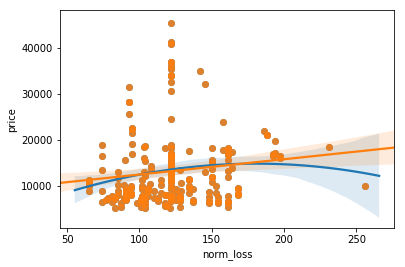

In [7]:
                        # Visualisation of 'Normalisation Loss' against 'Price'
plot2=sns.regplot(x="norm_loss", y="price", data=df,order=2)
plot2
plot1=sns.regplot(x=df['norm_loss'],y=df['price'],data=df,fit_reg=True)
plot1

The polynomial fit first gradually increases and then starts to decrease while the linear regression line remains almost horizontal with respect to price. Therefore,'Normalisation Loss' is not a good predictor attribute.

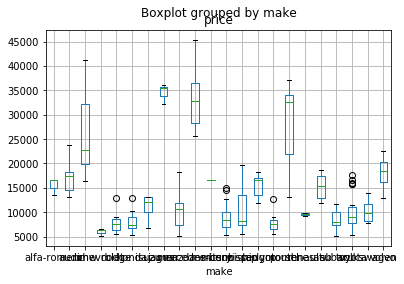

In [8]:
                        # Visualisation of 'Car Maker' against 'Price'
df.boxplot(by='make',column=['price'],grid=True)


From the box plot, it is clear that there is a lot of overlapping in the price corresponding to the Car Maker . Therefore, this cannot be considered as a good predictor attribute for price.

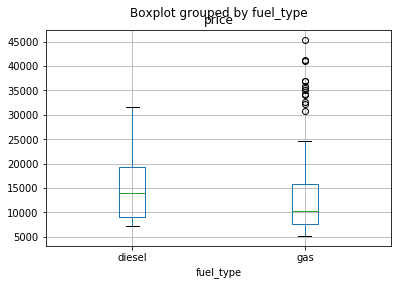

In [9]:
                     # Visualisation of 'Fuel Type' against 'Price'
df.boxplot(by='fuel_type',column=['price'],grid=True)


 There is a clear overlapping in the price of Diesel and Gas type of fuels. Therefore , Fuel Type cannot be considered as a good attribute for Prediction of Price

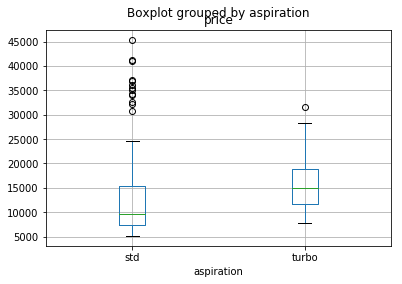

In [10]:
                 # Visualisation of 'Aspiration' against 'Price'
df.boxplot(by='aspiration',column=['price'],grid=True)


There is a clear overlapping in the price of 'std' and 'turbo' type of aspirations. Therefore , Fuel Type cannot be considered as a good attribute for Prediction of Price

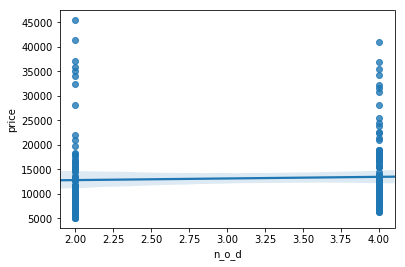

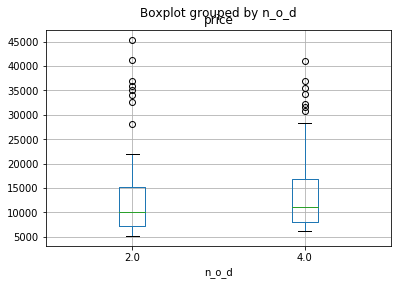

In [11]:
                     # Visualisation of 'Number of Doors' against 'Price'
sns.regplot(x=df['n_o_d'],y=df['price'],data=df,fit_reg=True)
df.boxplot(by='n_o_d',column=['price'],grid=True)

The Regression line is almost horizontal and The box plot also shows a clear overlapping in the price . Therefore 'Number of Doors' cannot be considered as a good predictor attribute

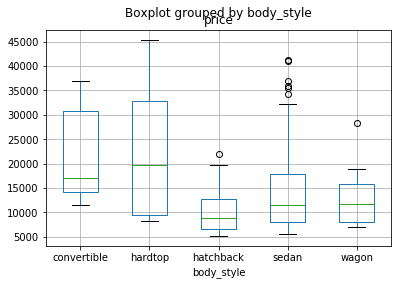

In [12]:
                         # Visualisation of 'Body Style' against 'Price'
df.boxplot(by='body_style',column=['price'],grid=True)

The box plot shows that there is a clear overlapping in the price corresponding to the body styles. Infact , the price of 'Convertable' type lies completely within the range of the 'hardtop' type of car. Therefore, Body Style cannot be considered as a good predictor attribute for Price

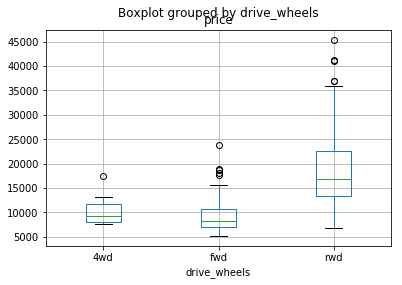

In [13]:
                   # Visualisation of 'Driving Wheels' against 'Price'
df.boxplot(by='drive_wheels',column=['price'],grid=True)

The boxplot shows that there is overlapping in the price of '4wd' and 'fwd' type of wheel base. Therefore, this attribute cannot be considered as a good predictor attribute for Price.

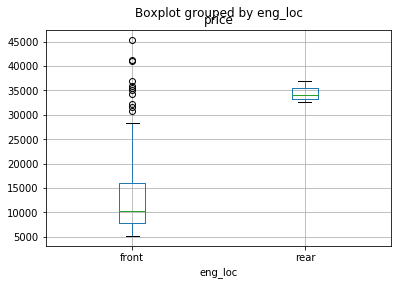

In [14]:
                        # Visualisation of 'Engine Location' against 'Price'
df.boxplot(by='eng_loc',column=['price'],grid=True)

The boxplot shows that there is no clear overlapping in the price corresponding to the engine location and also there is a huge difference in the price. Therefore, 'Engine location' can be considered as a good predictor attribute for Price. 

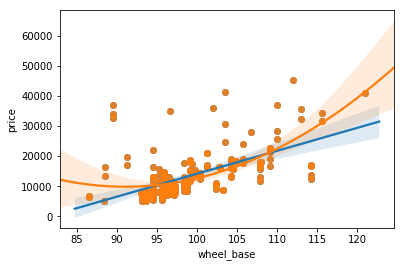

In [15]:
                    # Visualisation of 'Wheel Base' against 'Price'
sns.regplot(x=df['wheel_base'],y=df['price'],data=df,fit_reg=True)
plot2=sns.regplot(x="wheel_base", y="price", data=df,order=2)
plot2

The scatter plot shows that the wheel base is directly proportional to the price of the car . Thus, the 'Wheel Base' attribute can be considered as a good predictor attribute for Price

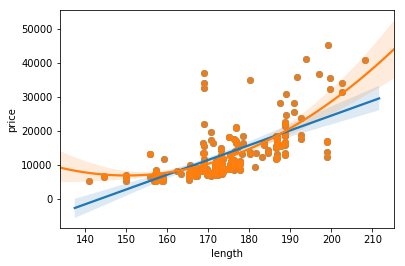

In [16]:
                    # Visualisation of 'Length' against 'Price'
sns.regplot(x=df['length'],y=df['price'],data=df,fit_reg=True)
plot2=sns.regplot(x="length", y="price", data=df,order=2)
plot2

From the Regression plot, it can be seen the height is directly proportional to the height. The price is the car is increasing considerably with the increase in the 'length' of the car . Therefore , 'Length' can also be considered as a good predictor attribute for Price.

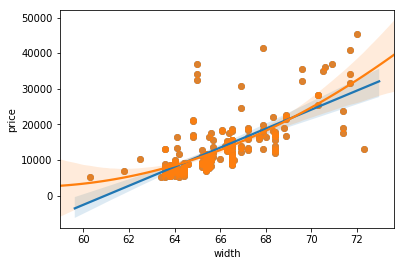

In [17]:
                  # Visualisation of 'Width' against 'Price'
sns.regplot(x=df['width'],y=df['price'],data=df,fit_reg=True)
plot2=sns.regplot(x="width", y="price", data=df,order=2)
plot2

From the regression plot,it is clear that the width of car is directly proportional to the price. And also the Price of car increases considerably with the width of car . Therefore , 'Width' can be considered as a good predictor attribute for 'Price'.

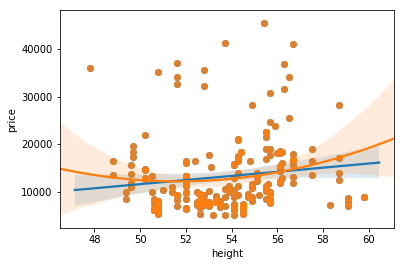

In [18]:
                # Visualisation of 'Height' against 'Price'
sns.regplot(x=df['height'],y=df['price'],data=df,fit_reg=True)
plot2=sns.regplot(x="height", y="price", data=df,order=2)
plot2

The Regression plot shows that the Regression line remains almost horizontal without any much change in the price with increase or decrease in the height. Therefore, 'Height' cannot be a good predictor attribute for Price.

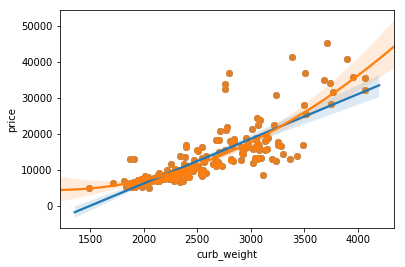

In [19]:
                      # Visualisation of 'Curb Weight' against 'Price'
sns.regplot(x=df['curb_weight'],y=df['price'],data=df,fit_reg=True)
plot2=sns.regplot(x="curb_weight", y="price", data=df,order=2)
plot2

From the Regression plot , it is clear that the Curb Weight is directly proportional to the price . The price of car increases considerably with the increase in the Curb Weight of the Car . Therefore, it can be considered as a good Predictor for Price.

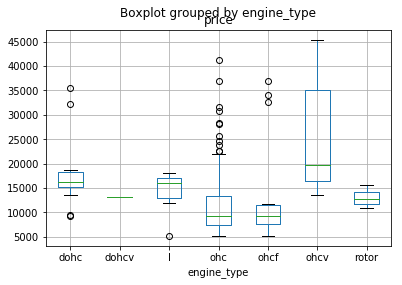

In [20]:
                     # Visualisation of 'Engine Type' against 'Price'
df.boxplot(by='engine_type',column=['price'],grid=True)

The boxplot shows that there is clear overlapping in the price corresponding to the 'Engine Type' and also the price of 'dohc' lies within the price of the 'I' type . Therefore , this cannot be considered as a good predictor attribute for Price.

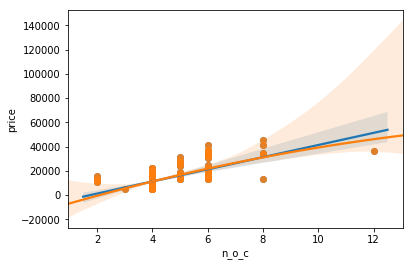

In [21]:
                         # Visualisation of 'Number of Cylinders' against 'Price'
sns.regplot(x=df['n_o_c'],y=df['price'],data=df,fit_reg=True)
plot2=sns.regplot(x="n_o_c", y="price", data=df,order=2)
plot2

From the Regression plot it is clear that the 'Number of Cylinders' is directly proportional to the Price . And also the price takes a big increase leap with increase in the 'Number of Cylinders'. Therefore , 'Number of Cylinders' can be considered as a good predictor attribute for Price.

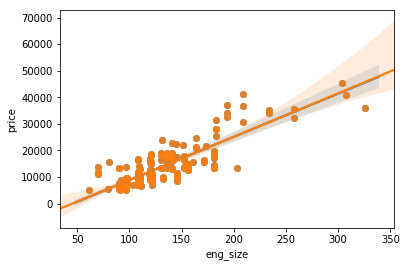

In [22]:
                     # Visualisation of 'Engine Size' against 'Price'
sns.regplot(x=df['eng_size'],y=df['price'],data=df,fit_reg=True)
plot2=sns.regplot(x="eng_size", y="price", data=df,order=2)
plot2

The Regression plot indicates that the Price of Car is directly proportional to the car size. The car price increases by a considerable factor with increase in the 'Engine Size'. Therefore , 'Engine Size' can be a good predictor attribute for Price.

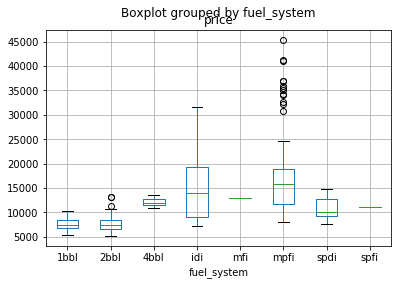

In [23]:
                 # Visualisation of 'Fuel System' against 'Price'
df.boxplot(by='fuel_system',column=['price'],grid=True)

The boxplot depicts that there is overlapping in the price of cars corresponding to the fuel system. Thus , this is not a good Predictor attribute for Price.

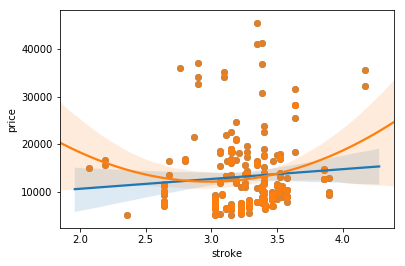

In [24]:
               # Visualisation of 'Stroke' against 'Price'
sns.regplot(x=df['stroke'],y=df['price'],data=df,fit_reg=True)
plot2=sns.regplot(x="stroke", y="price", data=df,order=2)
plot2

The Regression line remains almost horizontal and the price do not gets affected much by any variation in the Strokes of the Car . Therefore, 'Stroke' is not a good Predictor attribute for Price.

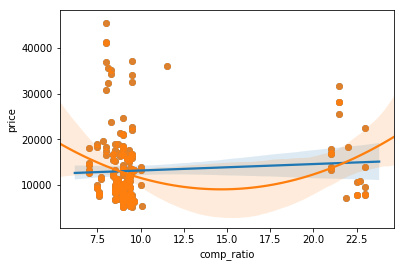

In [25]:
                 # Visualisation of 'Compression Ratio' against 'Price'
sns.regplot(x=df['comp_ratio'],y=df['price'],data=df,fit_reg=True)
plot2=sns.regplot(x="comp_ratio", y="price", data=df,order=2)
plot2

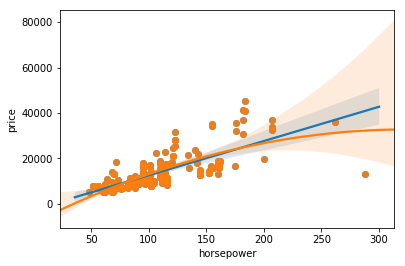

In [26]:
                      # Visualisation of 'Horsepower' against 'Price'
sns.regplot(x=df['horsepower'],y=df['price'],data=df,fit_reg=True)
plot2=sns.regplot(x="horsepower", y="price", data=df,order=2)
plot2

From the Regression plot , it is observed that the price of the car increases with increase in the Power of the car. Even the slope of the regression line is also high . Therefore the 'Horsepower' is also a good predictor attribute for price. 

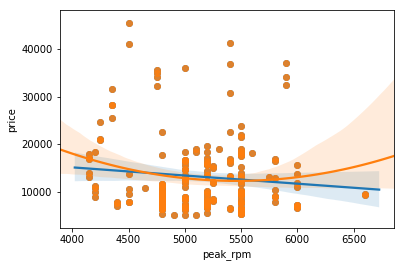

In [27]:
                     # Visualisation of 'Peak Rpm' against 'Price'
sns.regplot(x=df['peak_rpm'],y=df['price'],data=df,fit_reg=True)
plot2=sns.regplot(x="peak_rpm", y="price", data=df,order=2)
plot2

The regression line remains almost horizontal and does not shows any considerable change with any variation in the peak rpm of the car. Therefore , the 'peak_rpm' is not a good predictor attribute for Price.

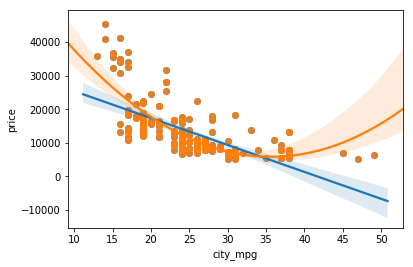

In [28]:
                   # Visualisation of 'City Mileage' against 'Price'
sns.regplot(x=df['city_mpg'],y=df['price'],data=df,fit_reg=True)
plot2=sns.regplot(x="city_mpg", y="price", data=df,order=2)
plot2

The scatter plot shows that Price of car is inversely proportional to the 'city_mpg' of the car. There is a big change in the price of the car as the 'city mpg' of the car increases. Therefore 'city_mpg' is a good predictor attribute for Price.

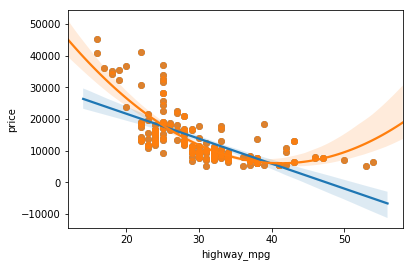

In [29]:
                       # Visualisation of 'Highway Mileage' against 'Price'
sns.regplot(x=df['highway_mpg'],y=df['price'],data=df,fit_reg=True)
plot2=sns.regplot(x="highway_mpg", y="price", data=df,order=2)
plot2

The scatter plot shows that Price of car is inversely proportional to the 'highway mpg' of the car. There is a big change in the price of the car as the 'city mpg' of the car increases. Therefore 'highway_mpg' is a good predictor attribute for Price.

                             # Statistical Analysis of Numeric Data

In [30]:
                           # Correlation of Symboling with Price
df[['symboling','price']].corr()

,symboling,price
symboling,1.000000,-0.082201
price,-0.082201,1.000000


The correaltion between Symboling and Price is '-0.082201' which is very low. Thus, they are not strongly correlated and hence do not have much impact on each other

In [31]:
                       # Correlation of Normalisation loss with Price
df[['norm_loss','price']].corr()  

,norm_loss,price
norm_loss,1.000000,0.133999
price,0.133999,1.000000


The correaltion between Normalisation loss and Price is '0.133999' which is very low. Thus, they are not strongly correlated and hence do not have much impact on each other

In [32]:
                    # Correlation of 'Number of Doors' with Price
df[['n_o_d','price']].corr()  

,n_o_d,price
n_o_d,1.000000,0.041945
price,0.041945,1.000000


The correaltion between Number of doors and Price is '0.041945' which is very low. Thus, they are not strongly correlated and hence do not have much impact on each other

In [33]:
                    # Correlation of 'Wheel Base' with Price
df[['wheel_base','price']].corr()  

,wheel_base,price
wheel_base,1.000000,0.583168
price,0.583168,1.000000


The correaltion between 'Wheel Base' and Price is '0.58316' which is low. Thus, they are moderately correlated and hence do not have considerable impact on each other

In [34]:
                        # Correlation of Length with Price
df[['length','price']].corr()  

,length,price
length,1.000000,0.682986
price,0.682986,1.000000


The correaltion between 'Length' and Price is '0.6829' which is high. Thus, they are strongly correlated and hence do have impact on each other

In [35]:
                               # Correlation of Width with Price
df[['width','price']].corr()      

,width,price
width,1.000000,0.728699
price,0.728699,1.000000


The correaltion between 'Width' and Price is '0.72869' which is high. Thus, they are strongly correlated and hence do have impact on each other

In [36]:
                               # Correlation of Height with Price
df[['height','price']].corr()      

,height,price
height,1.000000,0.134388
price,0.134388,1.000000


The correaltion between 'Heigth' and Price is '0.13438' which is very low. Thus, they are not strongly correlated and hence do not have impact on each other

In [37]:
                               # Correlation of Curb weigth with Price
df[['curb_weight','price']].corr()      

,curb_weight,price
curb_weight,1.000000,0.820825
price,0.820825,1.000000


The correaltion between 'Curb Weigth' and Price is '0.820825' which is very high . Thus, they are strongly correlated and hence have great impact on each other

In [38]:
                               # Correlation of Number of Cylinders with Price
df[['n_o_c','price']].corr()      

,n_o_c,price
n_o_c,1.00000,0.68777
price,0.68777,1.00000


The correaltion between 'Number of Cylinders' and Price is '0.68777' which is high . Thus, they are strongly correlated and hence have great impact on each other

In [39]:
                               # Correlation of Engine size with Price
df[['eng_size','price']].corr()      

,eng_size,price
eng_size,1.000000,0.861752
price,0.861752,1.000000


The correlation between Engine size and price is 0.861752 which is high. Thus, they are strongly correlated and hence have great impact on each other  

In [40]:
                               # Correlation of Stroke with Price
df[['stroke','price']].corr()      

,stroke,price
stroke,1.000000,0.082095
price,0.082095,1.000000


The correlation between stroke and price is 0.082095 which is low. Thus, they are not correlated and hence have no impact on each other 

In [41]:
                               # Correlation of Bore with Price
df[['bore','price']].corr()      

,bore,price
bore,1.0000,0.5323
price,0.5323,1.0000


The correlation between Bore and price is 0.5323 which is moderate. Thus, they are modeartely correlated and hence have moderate impact on each other  

In [42]:
                               # Correlation of Compression ratio with Price
df[['comp_ratio','price']].corr()      

,comp_ratio,price
comp_ratio,1.00000,0.07099
price,0.07099,1.00000


The correlation between Conpression ratio and price is 0.07099 which is low. Thus, they are not correlated and hence have no impact on each other 

In [43]:
                               # Correlation of Horsepower with Price
df[['horsepower','price']].corr()      

,horsepower,price
horsepower,1.000000,0.757917
price,0.757917,1.000000


The correaltion between 'Horsepower' and Price is '0.757917' which is very high . Thus, they are strongly correlated and hence have great impact on each other

In [44]:
                               # Correlation of Peak RPM with Price
df[['peak_rpm','price']].corr()      

,peak_rpm,price
peak_rpm,1.000000,-0.104078
price,-0.104078,1.000000


The correlation between Peak RPM and price is -0.104078 which is  negatively low. Thus, they are not correlated and hence have no impact on each other 

In [45]:
                            # Correlation of City MPG with Price
df[['city_mpg','price']].corr()      

,city_mpg,price
city_mpg,1.000000,-0.667449
price,-0.667449,1.000000


The correaltion between 'City MPG' and Price is '-0.667449' which is negatively high . Thus, they are strongly correlated and hence have great impact on each other

In [46]:
                             # Correlation of Highway MPG with Price
df[['highway_mpg','price']].corr()      

,highway_mpg,price
highway_mpg,1.000000,-0.690526
price,-0.690526,1.000000


The correaltion between 'Highway MPG' and Price is '-0.690526' which is negatively high . Thus, they are strongly correlated and hence have great impact on each other

                 # Correalation of all numeric attributes with Price for overview

In [47]:
df.corr()

,symboling,norm_loss,n_o_d,wheel_base,length,width,height,curb_weight,n_o_c,eng_size,bore,stroke,comp_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
symboling,1.000000,0.465190,-0.663595,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.113129,-0.105790,-0.130083,-0.008689,-0.178515,0.071389,0.273886,-0.035823,0.034606,-0.082201
norm_loss,0.465190,1.000000,-0.357192,-0.056518,0.019209,0.084195,-0.370706,0.097785,0.108081,0.110997,-0.029266,0.054929,-0.114525,0.203434,0.237039,-0.218749,-0.178221,0.133999
n_o_d,-0.663595,-0.357192,1.000000,0.439635,0.385675,0.197735,0.540286,0.190720,-0.019503,0.013919,0.108510,-0.006892,0.171797,-0.128184,-0.240600,-0.014271,-0.037452,0.041945
wheel_base,-0.531954,-0.056518,0.439635,1.000000,0.874587,0.795144,0.589435,0.776386,0.339507,0.569329,0.488760,0.160944,0.249786,0.351957,-0.363015,-0.470414,-0.544082,0.583168
length,-0.357612,0.019209,0.385675,0.874587,1.000000,0.841118,0.491029,0.877728,0.430672,0.683360,0.606462,0.129522,0.158414,0.554434,-0.283001,-0.670909,-0.704662,0.682986
width,-0.232919,0.084195,0.197735,0.795144,0.841118,1.000000,0.279210,0.867032,0.545007,0.735433,0.559152,0.182939,0.181129,0.642195,-0.216906,-0.642704,-0.677218,0.728699
height,-0.541038,-0.370706,0.540286,0.589435,0.491029,0.279210,1.000000,0.295572,-0.013995,0.067149,0.171101,-0.055351,0.261214,-0.110137,-0.322395,-0.048640,-0.107358,0.134388
curb_weight,-0.227691,0.097785,0.190720,0.776386,0.877728,0.867032,0.295572,1.000000,0.609727,0.850594,0.648485,0.168783,0.151362,0.750968,-0.266021,-0.757414,-0.797465,0.820825
n_o_c,-0.113129,0.108081,-0.019503,0.339507,0.430672,0.545007,-0.013995,0.609727,1.000000,0.846031,0.231439,0.008151,-0.020002,0.691208,-0.126689,-0.445837,-0.466666,0.687770
eng_size,-0.105790,0.110997,0.013919,0.569329,0.683360,0.735433,0.067149,0.850594,0.846031,1.000000,0.583798,0.203094,0.028971,0.810713,-0.242931,-0.653658,-0.677470,0.861752


                     # Heat Map of Correlatons for Graphical Interpretation

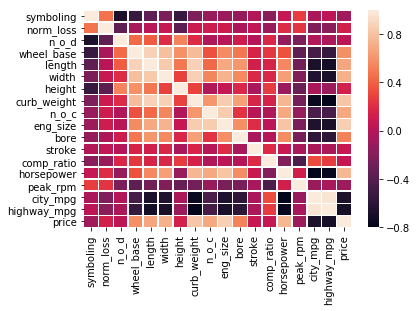

In [50]:
sns.heatmap(df.corr(),linewidths=.5)